In [1]:
import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library

print('Libraries imported.')

Solving environment: done

## Package Plan ##

  environment location: /opt/conda/envs/Python36

  added / updated specs: 
    - geopy


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    geographiclib-1.50         |             py_0          34 KB  conda-forge
    python_abi-3.6             |          1_cp36m           4 KB  conda-forge
    ca-certificates-2019.11.28 |       hecc5488_0         145 KB  conda-forge
    geopy-1.21.0               |             py_0          58 KB  conda-forge
    openssl-1.1.1e             |       h516909a_0         2.1 MB  conda-forge
    certifi-2019.11.28         |   py36h9f0ad1d_1         149 KB  conda-forge
    ------------------------------------------------------------
                                           Total:         2.5 MB

The following NEW packages will be INSTALLED:

    geographiclib:   1.50-py_0         conda-forge
    geopy:           1

In [2]:
Toronto_data=pd.read_html('https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M')[0]

In [3]:
Toronto_data.shape

(20, 9)

In [4]:
Toronto_data

,0,1,2,3,4,5,6,7,8
0,M1ANot assigned,M2ANot assigned,M3ANorth York(Parkwoods),M4ANorth York(Victoria Village),M5ADowntown Toronto(Regent Park / Harbourfront),M6ANorth York(Lawrence Manor / Lawrence Heights),M7AQueen's Park / Ontario Provincial Government,M8ANot assigned,M9AEtobicoke(Islington Avenue)
1,M1BScarborough(Malvern / Rouge),M2BNot assigned,M3BNorth York(Don Mills)North,M4BEast York(Parkview Hill / Woodbine Gardens),"M5BDowntown Toronto(Garden District, Ryerson)",M6BNorth York(Glencairn),M7BNot assigned,M8BNot assigned,M9BEtobicoke(West Deane Park / Princess Garden...
2,M1CScarborough(Rouge Hill / Port Union / Highl...,M2CNot assigned,M3CNorth York(Don Mills)South(Flemingdon Park),M4CEast York(Woodbine Heights),M5CDowntown Toronto(St. James Town),M6CYork(Humewood-Cedarvale),M7CNot assigned,M8CNot assigned,M9CEtobicoke(Eringate / Bloordale Gardens / Ol...
3,M1EScarborough(Guildwood / Morningside / West ...,M2ENot assigned,M3ENot assigned,M4EEast Toronto(The Beaches),M5EDowntown Toronto(Berczy Park),M6EYork(Caledonia-Fairbanks),M7ENot assigned,M8ENot assigned,M9ENot assigned
4,M1GScarborough(Woburn),M2GNot assigned,M3GNot assigned,M4GEast York(Leaside),M5GDowntown Toronto(Central Bay Street),M6GDowntown Toronto(Christie),M7GNot assigned,M8GNot assigned,M9GNot assigned
5,M1HScarborough(Cedarbrae),M2HNorth York(Hillcrest Village),M3HNorth York(Bathurst Manor / Wilson Heights ...,M4HEast York(Thorncliffe Park),M5HDowntown Toronto(Richmond / Adelaide / King),M6HWest Toronto(Dufferin / Dovercourt Village),M7HNot assigned,M8HNot assigned,M9HNot assigned
6,M1JScarborough(Scarborough Village),M2JNorth York(Fairview / Henry Farm / Oriole),M3JNorth York(Northwood Park / York University),M4JEast YorkEast Toronto(The Danforth East),M5JDowntown Toronto(Harbourfront East / Union ...,M6JWest Toronto(Little Portugal / Trinity),M7JNot assigned,M8JNot assigned,M9JNot assigned
7,M1KScarborough(Kennedy Park / Ionview / East B...,M2KNorth York(Bayview Village),M3KNorth York(Downsview)East (CFB Toronto),M4KEast Toronto(The Danforth West / Riverdale),M5KDowntown Toronto(Toronto Dominion Centre / ...,M6KWest Toronto(Brockton / Parkdale Village / ...,M7KNot assigned,M8KNot assigned,M9KNot assigned
8,M1LScarborough(Golden Mile / Clairlea / Oakridge),M2LNorth York(York Mills / Silver Hills),M3LNorth York(Downsview)West,M4LEast Toronto(India Bazaar / The Beaches West),M5LDowntown Toronto(Commerce Court / Victoria ...,M6LNorth York(North Park / Maple Leaf Park / U...,M7LNot assigned,M8LNot assigned,M9LNorth York(Humber Summit)
9,M1MScarborough(Cliffside / Cliffcrest / Scarbo...,M2MNorth York(Willowdale / Newtonbrook),M3MNorth York(Downsview)Central,M4MEast Toronto(Studio District),M5MNorth York(Bedford Park / Lawrence Manor East),M6MYork(Del Ray / Mount Dennis / Keelsdale and...,M7MNot assigned,M8MNot assigned,M9MNorth York(Humberlea / Emery)


In [5]:
tor_df1= pd.DataFrame(columns=['Postcode','Borough','Neighbourhood'])

In [6]:
tor_df1.head()

,Postcode,Borough,Neighbourhood


In [7]:

r1=0
for r in Toronto_data.index:
    for c in list(Toronto_data):
        #print(r ,'  ' ,c)
        val=Toronto_data.iloc[r][c]
        pc= val[:3]
        bo= val.split('(')[0][3:]
        ne= val[len(val.split('(')[0])+1:len(val)-1].replace('/',',')
        #print(ne)
        tor_df1.loc[r1,'Postcode']=pc
        tor_df1.loc[r1,'Borough']=bo
        tor_df1.loc[r1,'Neighbourhood']=ne
        r1=r1+1
        

In [8]:
tor_df1.shape


(180, 3)

In [9]:
tor_df1 = tor_df1[tor_df1.Borough != 'Not assigned']


In [10]:
tor_df1.head(100)


,Postcode,Borough,Neighbourhood
2,M3A,North York,Parkwoods
3,M4A,North York,Victoria Village
4,M5A,Downtown Toronto,"Regent Park , Harbourfront"
5,M6A,North York,"Lawrence Manor , Lawrence Heights"
6,M7A,Queen's Park / Ontario Provincial Government,
8,M9A,Etobicoke,Islington Avenue
9,M1B,Scarborough,"Malvern , Rouge"
11,M3B,North York,Don Mills)Nort
12,M4B,East York,"Parkview Hill , Woodbine Gardens"
13,M5B,Downtown Toronto,"Garden District, Ryerson"


In [11]:
tor_df1['Neighbourhood'].replace(" ", tor_df1["Borough"],inplace=True)

In [12]:
tor_df1.head(100)

,Postcode,Borough,Neighbourhood
2,M3A,North York,Parkwoods
3,M4A,North York,Victoria Village
4,M5A,Downtown Toronto,"Regent Park , Harbourfront"
5,M6A,North York,"Lawrence Manor , Lawrence Heights"
6,M7A,Queen's Park / Ontario Provincial Government,
8,M9A,Etobicoke,Islington Avenue
9,M1B,Scarborough,"Malvern , Rouge"
11,M3B,North York,Don Mills)Nort
12,M4B,East York,"Parkview Hill , Woodbine Gardens"
13,M5B,Downtown Toronto,"Garden District, Ryerson"


In [13]:
post_code= pd.read_csv("http://cocl.us/Geospatial_data")
post_code.rename(columns={'Postal Code': 'Postcode'}, inplace=True)
post_code.head()

,Postcode,Latitude,Longitude
0,M1B,43.806686,-79.194353
1,M1C,43.784535,-79.160497
2,M1E,43.763573,-79.188711
3,M1G,43.770992,-79.216917
4,M1H,43.773136,-79.239476


In [14]:
Neg_data = pd.merge(tor_df1, post_code, how='inner', on='Postcode')

In [15]:
Neg_data.head(10)

,Postcode,Borough,Neighbourhood,Latitude,Longitude
0,M3A,North York,Parkwoods,43.753259,-79.329656
1,M4A,North York,Victoria Village,43.725882,-79.315572
2,M5A,Downtown Toronto,"Regent Park , Harbourfront",43.654260,-79.360636
3,M6A,North York,"Lawrence Manor , Lawrence Heights",43.718518,-79.464763
4,M7A,Queen's Park / Ontario Provincial Government,,43.662301,-79.389494
5,M9A,Etobicoke,Islington Avenue,43.667856,-79.532242
6,M1B,Scarborough,"Malvern , Rouge",43.806686,-79.194353
7,M3B,North York,Don Mills)Nort,43.745906,-79.352188
8,M4B,East York,"Parkview Hill , Woodbine Gardens",43.706397,-79.309937
9,M5B,Downtown Toronto,"Garden District, Ryerson",43.657162,-79.378937


In [16]:
print('The dataframe has {} boroughs and {} neighborhoods.'.format(
        len(Neg_data['Borough'].unique()),
        Neg_data.shape[0]
    )
)

The dataframe has 15 boroughs and 103 neighborhoods.


In [17]:
Neg_data.drop([4,76,92,100],axis=0,inplace=True)

In [18]:
Neg_data.head(100)

,Postcode,Borough,Neighbourhood,Latitude,Longitude
0,M3A,North York,Parkwoods,43.753259,-79.329656
1,M4A,North York,Victoria Village,43.725882,-79.315572
2,M5A,Downtown Toronto,"Regent Park , Harbourfront",43.654260,-79.360636
3,M6A,North York,"Lawrence Manor , Lawrence Heights",43.718518,-79.464763
5,M9A,Etobicoke,Islington Avenue,43.667856,-79.532242
6,M1B,Scarborough,"Malvern , Rouge",43.806686,-79.194353
7,M3B,North York,Don Mills)Nort,43.745906,-79.352188
8,M4B,East York,"Parkview Hill , Woodbine Gardens",43.706397,-79.309937
9,M5B,Downtown Toronto,"Garden District, Ryerson",43.657162,-79.378937
10,M6B,North York,Glencairn,43.709577,-79.445073


In [99]:
#Neg_data=Neg_data.reset_index()

In [19]:
Neg_data.head(100)

,Postcode,Borough,Neighbourhood,Latitude,Longitude
0,M3A,North York,Parkwoods,43.753259,-79.329656
1,M4A,North York,Victoria Village,43.725882,-79.315572
2,M5A,Downtown Toronto,"Regent Park , Harbourfront",43.654260,-79.360636
3,M6A,North York,"Lawrence Manor , Lawrence Heights",43.718518,-79.464763
5,M9A,Etobicoke,Islington Avenue,43.667856,-79.532242
6,M1B,Scarborough,"Malvern , Rouge",43.806686,-79.194353
7,M3B,North York,Don Mills)Nort,43.745906,-79.352188
8,M4B,East York,"Parkview Hill , Woodbine Gardens",43.706397,-79.309937
9,M5B,Downtown Toronto,"Garden District, Ryerson",43.657162,-79.378937
10,M6B,North York,Glencairn,43.709577,-79.445073


In [24]:
pop_df=pd.read_html('https://en.wikipedia.org/wiki/Demographics_of_Toronto')[6]

In [25]:
pop_df.head()

Visible Minorities as % of Population (2016 Census) & Top Ethnic Origins  \
                                              Riding (2013 Redistribution)   
0                                 Parkdale-High Park                         
1                                   Etobicoke Centre                         
2                                Etobicoke-Lakeshore                         
3                                 Toronto-St. Paul's                         
4                                  Eglinton-Lawrence                         

                                                       \
  Percentage Most Populous Ethnic Origin Percentage.1   
0       26.2                     English         22.3   
1       27.1                     Italian         15.1   
2       27.7                     English         17.1   
3       28.3                     English         18.5   
4       31.8                    Canadian         14.7   

                                                                            \
  Top Riding for Ethnic Origin (Percentage) Most Populous Visible Minority   
0  Irish (20.0); German (9.8); French (8.9)                          Black   
1           Italian (15.1); Ukrainian (8.1)                    South Asian   
2                                       NaN                    South Asian   
3                                       NaN                          Black   
4                             Polish (12.0)                       Filipino   

                                                             \
  Percentage.2 Top Riding for Visible Minority (Percentage)   
0          5.3                                          NaN   
1          5.9                                          NaN   
2          5.5                                          NaN   
3          5.1                                          NaN   
4         10.7                                          NaN   

                                         
  Unnamed: 8_level_1 Unnamed: 9_level_1  
0                NaN                NaN  
1                NaN                NaN  
2                NaN                NaN  
3                NaN                NaN  
4                NaN                NaN

In [26]:
r1=0
pop_df1= pd.DataFrame(columns=['Riding','EthnicOrigin','EthnicPop','Minority','MinorityPop'])
for r in pop_df.index:
    
    #for c in list(pop_df):
        #print(r ,'  ' ,c)
    #val=pop_df.iloc[r][0]
        
    #print(val)
    pop_df1.loc[r,'Riding']=pop_df.iloc[r][0]
    pop_df1.loc[r,'EthnicOrigin']=pop_df.iloc[r][2]
    pop_df1.loc[r,'EthnicPop']=pop_df.iloc[r][1]
    pop_df1.loc[r,'Minority']= pop_df.iloc[r][5]
    pop_df1.loc[r,'MinorityPop']=pop_df.iloc[r][6]
       
        

In [27]:
pop_df1.head(50)

,Riding,EthnicOrigin,EthnicPop,Minority,MinorityPop
0,Parkdale-High Park,English,26.2,Black,5.3
1,Etobicoke Centre,Italian,27.1,South Asian,5.9
2,Etobicoke-Lakeshore,English,27.7,South Asian,5.5
3,Toronto-St. Paul's,English,28.3,Black,5.1
4,Eglinton-Lawrence,Canadian,31.8,Filipino,10.7
5,Davenport,Portuguese,31.9,Black,6.4
6,University-Rosedale,English,32.7,Chinese,14
7,Toronto-Danforth,English,32.8,Chinese,12.3
8,Beaches-East York,English,33.6,South Asian,10.9
9,Don Valley West,English,41.5,South Asian,13.3


In [30]:
address = 'Toronto'

geolocator = Nominatim(user_agent="ny_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Toronto are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Toronto are 43.653963, -79.387207.


In [31]:
# create map of East Toronto using latitude and longitude values
map_Toronto = folium.Map(location=[latitude, longitude], zoom_start=11)

# add markers to map
for lat, lng, label in zip(Neg_data['Latitude'], Neg_data['Longitude'], Neg_data['Neighbourhood']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_Toronto)  
    
map_Toronto

In [32]:
# The code was removed by Watson Studio for sharing.

In [33]:
# The code was removed by Watson Studio for sharing.

In [34]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [35]:
toronto_venues = getNearbyVenues(names=Neg_data['Neighbourhood'],
                                   latitudes=Neg_data['Latitude'],
                                   longitudes=Neg_data['Longitude']
                                  )

Parkwoods
Victoria Village
Regent Park , Harbourfront
Lawrence Manor , Lawrence Heights
Islington Avenue
Malvern , Rouge
Don Mills)Nort
Parkview Hill , Woodbine Gardens
Garden District, Ryerson
Glencairn
West Deane Park , Princess Gardens , Martin Grove , Islington , Cloverdale
Rouge Hill , Port Union , Highland Creek
Don Mills)South(Flemingdon Park
Woodbine Heights
St. James Town
Humewood-Cedarvale
Eringate , Bloordale Gardens , Old Burnhamthorpe , Markland Wood
Guildwood , Morningside , West Hill
The Beaches
Berczy Park
Caledonia-Fairbanks
Woburn
Leaside
Central Bay Street
Christie
Cedarbrae
Hillcrest Village
Bathurst Manor , Wilson Heights , Downsview North
Thorncliffe Park
Richmond , Adelaide , King
Dufferin , Dovercourt Village
Scarborough Village
Fairview , Henry Farm , Oriole
Northwood Park , York University
The Danforth East
Harbourfront East , Union Station , Toronto Islands
Little Portugal , Trinity
Kennedy Park , Ionview , East Birchmount Park
Bayview Village
Downsview)East 

In [40]:
print(toronto_venues.shape)
toronto_venues.head()

(2076, 7)


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Parkwoods,43.753259,-79.329656,Brookbanks Park,43.751976,-79.332140,Park
1,Parkwoods,43.753259,-79.329656,Variety Store,43.751974,-79.333114,Food & Drink Shop
2,Victoria Village,43.725882,-79.315572,Victoria Village Arena,43.723481,-79.315635,Hockey Arena
3,Victoria Village,43.725882,-79.315572,Tim Hortons,43.725517,-79.313103,Coffee Shop
4,Victoria Village,43.725882,-79.315572,Portugril,43.725819,-79.312785,Portuguese Restaurant


In [41]:
# one hot encoding
toronto_onehot = pd.get_dummies(toronto_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
toronto_onehot['Neighborhood'] = toronto_venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [toronto_onehot.columns[-1]] + list(toronto_onehot.columns[:-1])
toronto_onehot = toronto_onehot[fixed_columns]

toronto_onehot.head()

,Yoga Studio,Accessories Store,Afghan Restaurant,Airport,Airport Food Court,Airport Gate,Airport Lounge,Airport Service,Airport Terminal,American Restaurant,Antique Shop,Aquarium,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Auto Garage,BBQ Joint,Baby Store,Bagel Shop,Bakery,Bank,Bar,Baseball Field,Baseball Stadium,Basketball Court,Basketball Stadium,Beach,Bed & Breakfast,Beer Bar,Beer Store,Belgian Restaurant,Bike Shop,Bistro,Board Shop,Boat or Ferry,Bookstore,Boutique,Brazilian Restaurant,Breakfast Spot,Brewery,Bridal Shop,Bubble Tea Shop,Building,Burger Joint,Burrito Place,Bus Line,Bus Station,Bus Stop,Business Service,Butcher,Cafeteria,Café,Cajun / Creole Restaurant,Camera Store,Candy Store,Caribbean Restaurant,Cheese Shop,Chinese Restaurant,Chocolate Shop,Church,Climbing Gym,Clothing Store,Cocktail Bar,Coffee Shop,College Arts Building,College Gym,College Rec Center,College Stadium,Colombian Restaurant,Comfort Food Restaurant,Comic Shop,Concert Hall,Construction & Landscaping,Convenience Store,Cosmetics Shop,Coworking Space,Creperie,Cuban Restaurant,Cupcake Shop,Curling Ice,Dance Studio,Deli / Bodega,Department Store,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Distribution Center,Dog Run,Doner Restaurant,Donut Shop,Drugstore,Dumpling Restaurant,Eastern European Restaurant,Electronics Store,Empanada Restaurant,Ethiopian Restaurant,Event Space,Falafel Restaurant,Farmers Market,Fast Food Restaurant,Field,Filipino Restaurant,Fish & Chips Shop,Fish Market,Flea Market,Flower Shop,Food,Food & Drink Shop,Food Court,Food Truck,Fountain,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Fruit & Vegetable Store,Furniture / Home Store,Gaming Cafe,Garden,Gas Station,Gastropub,Gay Bar,General Entertainment,General Travel,German Restaurant,Gift Shop,Gluten-free Restaurant,Golf Course,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Hakka Restaurant,Harbor / Marina,Hardware Store,Health & Beauty Service,Health Food Store,Historic Site,History Museum,Hobby Shop,Hockey Arena,Home Service,Hospital,Hostel,Hotel,Hotel Bar,Hotpot Restaurant,Housing Development,IT Services,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Indonesian Restaurant,Intersection,Irish Pub,Italian Restaurant,Japanese Restaurant,Jazz Club,Jewelry Store,Juice Bar,Kids Store,Korean Restaurant,Lake,Latin American Restaurant,Light Rail Station,Lingerie Store,Liquor Store,Locksmith,Lounge,Luggage Store,Mac & Cheese Joint,Market,Massage Studio,Medical Center,Mediterranean Restaurant,Men's Store,Metro Station,Mexican Restaurant,Middle Eastern Restaurant,Miscellaneous Shop,Mobile Phone Shop,Modern European Restaurant,Monument / Landmark,Motel,Movie Theater,Moving Target,Museum,Music Venue,Neighborhood,New American Restaurant,Nightclub,Noodle House,Office,Opera House,Organic Grocery,Other Great Outdoors,Outdoor Sculpture,Park,Performing Arts Venue,Pet Store,Pharmacy,Pizza Place,Plane,Playground,Plaza,Poke Place,Polish Restaurant,Pool,Portuguese Restaurant,Poutine Place,Pub,Ramen Restaurant,Record Shop,Rental Car Location,Restaurant,River,Roof Deck,Sake Bar,Salad Place,Salon / Barbershop,Sandwich Place,Scenic Lookout,Sculpture Garden,Seafood Restaurant,Shoe Store,Shopping Mall,Shopping Plaza,Skating Rink,Smoke Shop,Snack Place,Soccer Field,Spa,Speakeasy,Sporting Goods Shop,Sports Bar,Stadium,Stationery Store,Steakhouse,Strip Club,Supermarket,Supplement Shop,Sushi Restaurant,Swim School,Tailor Shop,Taiwanese Restaurant,Tanning Salon,Tapas Restaurant,Tea Room,Thai Restaurant,Theater,Theme Restaurant,Thrift / Vintage Store,Toy / Game Store,Trail,Train Station,Vegetarian / Vegan Restaurant,Video Game Store,Video Store,Vietnamese Restaurant,Warehouse Store,Wine Bar,Wine Shop,Wings Joint,Women's Store
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0

In [42]:
toronto_grouped = toronto_onehot.groupby('Neighborhood').mean().reset_index()
toronto_grouped

,Neighborhood,Yoga Studio,Accessories Store,Afghan Restaurant,Airport,Airport Food Court,Airport Gate,Airport Lounge,Airport Service,Airport Terminal,American Restaurant,Antique Shop,Aquarium,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Auto Garage,BBQ Joint,Baby Store,Bagel Shop,Bakery,Bank,Bar,Baseball Field,Baseball Stadium,Basketball Court,Basketball Stadium,Beach,Bed & Breakfast,Beer Bar,Beer Store,Belgian Restaurant,Bike Shop,Bistro,Board Shop,Boat or Ferry,Bookstore,Boutique,Brazilian Restaurant,Breakfast Spot,Brewery,Bridal Shop,Bubble Tea Shop,Building,Burger Joint,Burrito Place,Bus Line,Bus Station,Bus Stop,Business Service,Butcher,Cafeteria,Café,Cajun / Creole Restaurant,Camera Store,Candy Store,Caribbean Restaurant,Cheese Shop,Chinese Restaurant,Chocolate Shop,Church,Climbing Gym,Clothing Store,Cocktail Bar,Coffee Shop,College Arts Building,College Gym,College Rec Center,College Stadium,Colombian Restaurant,Comfort Food Restaurant,Comic Shop,Concert Hall,Construction & Landscaping,Convenience Store,Cosmetics Shop,Coworking Space,Creperie,Cuban Restaurant,Cupcake Shop,Curling Ice,Dance Studio,Deli / Bodega,Department Store,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Distribution Center,Dog Run,Doner Restaurant,Donut Shop,Drugstore,Dumpling Restaurant,Eastern European Restaurant,Electronics Store,Empanada Restaurant,Ethiopian Restaurant,Event Space,Falafel Restaurant,Farmers Market,Fast Food Restaurant,Field,Filipino Restaurant,Fish & Chips Shop,Fish Market,Flea Market,Flower Shop,Food,Food & Drink Shop,Food Court,Food Truck,Fountain,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Fruit & Vegetable Store,Furniture / Home Store,Gaming Cafe,Garden,Gas Station,Gastropub,Gay Bar,General Entertainment,General Travel,German Restaurant,Gift Shop,Gluten-free Restaurant,Golf Course,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Hakka Restaurant,Harbor / Marina,Hardware Store,Health & Beauty Service,Health Food Store,Historic Site,History Museum,Hobby Shop,Hockey Arena,Home Service,Hospital,Hostel,Hotel,Hotel Bar,Hotpot Restaurant,Housing Development,IT Services,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Indonesian Restaurant,Intersection,Irish Pub,Italian Restaurant,Japanese Restaurant,Jazz Club,Jewelry Store,Juice Bar,Kids Store,Korean Restaurant,Lake,Latin American Restaurant,Light Rail Station,Lingerie Store,Liquor Store,Locksmith,Lounge,Luggage Store,Mac & Cheese Joint,Market,Massage Studio,Medical Center,Mediterranean Restaurant,Men's Store,Metro Station,Mexican Restaurant,Middle Eastern Restaurant,Miscellaneous Shop,Mobile Phone Shop,Modern European Restaurant,Monument / Landmark,Motel,Movie Theater,Moving Target,Museum,Music Venue,New American Restaurant,Nightclub,Noodle House,Office,Opera House,Organic Grocery,Other Great Outdoors,Outdoor Sculpture,Park,Performing Arts Venue,Pet Store,Pharmacy,Pizza Place,Plane,Playground,Plaza,Poke Place,Polish Restaurant,Pool,Portuguese Restaurant,Poutine Place,Pub,Ramen Restaurant,Record Shop,Rental Car Location,Restaurant,River,Roof Deck,Sake Bar,Salad Place,Salon / Barbershop,Sandwich Place,Scenic Lookout,Sculpture Garden,Seafood Restaurant,Shoe Store,Shopping Mall,Shopping Plaza,Skating Rink,Smoke Shop,Snack Place,Soccer Field,Spa,Speakeasy,Sporting Goods Shop,Sports Bar,Stadium,Stationery Store,Steakhouse,Strip Club,Supermarket,Supplement Shop,Sushi Restaurant,Swim School,Tailor Shop,Taiwanese Restaurant,Tanning Salon,Tapas Restaurant,Tea Room,Thai Restaurant,Theater,Theme Restaurant,Thrift / Vintage Store,Toy / Game Store,Trail,Train Station,Vegetarian / Vegan Restaurant,Video Game Store,Video Store,Vietnamese Restaurant,Warehouse Store,Wine Bar,Wine Shop,Wings Joint,Women's Store
0,Agincourt,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.0000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,

In [43]:
columns = ['Neighborhood','Indian Restaurant']

neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
#neighborhoods_venues_sorted['Cluster Labels'] = toronto_grouped['Cluster Labels']
neighborhoods_venues_sorted['Neighborhood'] = toronto_grouped['Neighborhood']
neighborhoods_venues_sorted['Indian Restaurant']= toronto_grouped['Indian Restaurant']

neighborhoods_venues_sorted.head()

,Neighborhood,Indian Restaurant
0,Agincourt,0.00
1,"Alderwood , Long Branch",0.00
2,"Bathurst Manor , Wilson Heights , Downsview North",0.00
3,Bayview Village,0.00
4,"Bedford Park , Lawrence Manor East",0.04


In [44]:
# set number of clusters
kclusters = 5

toronto_grouped_clustering = neighborhoods_venues_sorted.drop('Neighborhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(toronto_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 

array([0, 0, 0, 0, 3, 0, 0, 0, 0, 0], dtype=int32)

In [45]:
neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

In [46]:
neighborhoods_venues_sorted.head()

,Cluster Labels,Neighborhood,Indian Restaurant
0,0,Agincourt,0.00
1,0,"Alderwood , Long Branch",0.00
2,0,"Bathurst Manor , Wilson Heights , Downsview North",0.00
3,0,Bayview Village,0.00
4,3,"Bedford Park , Lawrence Manor East",0.04


In [47]:
toronto_merged = Neg_data

In [48]:
toronto_merged.rename(columns={'Neighbourhood': 'Neighborhood'}, inplace=True)
toronto_merged.head()


,Postcode,Borough,Neighborhood,Latitude,Longitude
0,M3A,North York,Parkwoods,43.753259,-79.329656
1,M4A,North York,Victoria Village,43.725882,-79.315572
2,M5A,Downtown Toronto,"Regent Park , Harbourfront",43.654260,-79.360636
3,M6A,North York,"Lawrence Manor , Lawrence Heights",43.718518,-79.464763
5,M9A,Etobicoke,Islington Avenue,43.667856,-79.532242


In [49]:
#toronto_merged = toronto_merged.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='Neighborhood')
toronto_merged1= pd.merge(toronto_merged,neighborhoods_venues_sorted,on='Neighborhood')

toronto_merged1.head()

,Postcode,Borough,Neighborhood,Latitude,Longitude,Cluster Labels,Indian Restaurant
0,M3A,North York,Parkwoods,43.753259,-79.329656,0,0.0
1,M4A,North York,Victoria Village,43.725882,-79.315572,0,0.0
2,M5A,Downtown Toronto,"Regent Park , Harbourfront",43.654260,-79.360636,0,0.0
3,M6A,North York,"Lawrence Manor , Lawrence Heights",43.718518,-79.464763,0,0.0
4,M1B,Scarborough,"Malvern , Rouge",43.806686,-79.194353,0,0.0


In [50]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(toronto_merged1['Latitude'], toronto_merged1['Longitude'], toronto_merged1['Neighborhood'], toronto_merged1['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

In [51]:
toronto_merged1.loc[toronto_merged1['Cluster Labels']==0]

,Postcode,Borough,Neighborhood,Latitude,Longitude,Cluster Labels,Indian Restaurant
0,M3A,North York,Parkwoods,43.753259,-79.329656,0,0.000000
1,M4A,North York,Victoria Village,43.725882,-79.315572,0,0.000000
2,M5A,Downtown Toronto,"Regent Park , Harbourfront",43.654260,-79.360636,0,0.000000
3,M6A,North York,"Lawrence Manor , Lawrence Heights",43.718518,-79.464763,0,0.000000
4,M1B,Scarborough,"Malvern , Rouge",43.806686,-79.194353,0,0.000000
5,M3B,North York,Don Mills)Nort,43.745906,-79.352188,0,0.000000
6,M4B,East York,"Parkview Hill , Woodbine Gardens",43.706397,-79.309937,0,0.000000
7,M5B,Downtown Toronto,"Garden District, Ryerson",43.657162,-79.378937,0,0.000000
8,M6B,North York,Glencairn,43.709577,-79.445073,0,0.000000
9,M1C,Scarborough,"Rouge Hill , Port Union , Highland Creek",43.784535,-79.160497,0,0.000000


In [52]:
toronto_merged1.loc[toronto_merged1['Cluster Labels']==1]

,Postcode,Borough,Neighborhood,Latitude,Longitude,Cluster Labels,Indian Restaurant
19,M1G,Scarborough,Woburn,43.770992,-79.216917,1,0.2


In [53]:
toronto_merged1.loc[toronto_merged1['Cluster Labels']==2]

,Postcode,Borough,Neighborhood,Latitude,Longitude,Cluster Labels,Indian Restaurant
60,M1P,Scarborough,"Dorset Park , Wexford Heights , Scarborough To...",43.75741,-79.273304,2,0.333333


In [54]:
toronto_merged1.loc[toronto_merged1['Cluster Labels']==3]

,Postcode,Borough,Neighborhood,Latitude,Longitude,Cluster Labels,Indian Restaurant
50,M5M,North York,"Bedford Park , Lawrence Manor East",43.733283,-79.419750,3,0.040000
69,M5R,Central Toronto,"The Annex , North Midtown , Yorkville",43.672710,-79.405678,3,0.045455
73,M4S,Central Toronto,Davisville,43.704324,-79.388790,3,0.029412
88,M4X,Downtown Toronto,"St. James Town , Cabbagetown",43.667967,-79.367675,3,0.022727


In [55]:
toronto_merged1.loc[toronto_merged1['Cluster Labels']==4]

,Postcode,Borough,Neighborhood,Latitude,Longitude,Cluster Labels,Indian Restaurant
26,M4H,East York,Thorncliffe Park,43.705369,-79.349372,4,0.095238


In [56]:
toronto_venues.head()

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Parkwoods,43.753259,-79.329656,Brookbanks Park,43.751976,-79.332140,Park
1,Parkwoods,43.753259,-79.329656,Variety Store,43.751974,-79.333114,Food & Drink Shop
2,Victoria Village,43.725882,-79.315572,Victoria Village Arena,43.723481,-79.315635,Hockey Arena
3,Victoria Village,43.725882,-79.315572,Tim Hortons,43.725517,-79.313103,Coffee Shop
4,Victoria Village,43.725882,-79.315572,Portugril,43.725819,-79.312785,Portuguese Restaurant


In [60]:
neg_ind= toronto_venues[toronto_venues['Venue Category'] == 'Indian Restaurant']   

In [61]:
neg_ind

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
406,Woburn,43.770992,-79.216917,Al-Hamd Biryani & Pizza,43.767585,-79.219570,Indian Restaurant
493,Central Bay Street,43.657952,-79.387383,Colaba Junction,43.660940,-79.385635,Indian Restaurant
573,Thorncliffe Park,43.705369,-79.349372,Iqbal Kebab & Sweet Centre,43.705923,-79.351521,Indian Restaurant
579,Thorncliffe Park,43.705369,-79.349372,Hakka Garden,43.704578,-79.349770,Indian Restaurant
885,"Harbourfront East , Union Station , Toronto Is...",43.640816,-79.381752,Indian Roti House,43.639060,-79.385422,Indian Restaurant
1315,"Bedford Park , Lawrence Manor East",43.733283,-79.419750,The Copper Chimney,43.736195,-79.420271,Indian Restaurant
1398,"Dorset Park , Wexford Heights , Scarborough To...",43.757410,-79.273304,Kairali,43.754915,-79.276945,Indian Restaurant
1399,"Dorset Park , Wexford Heights , Scarborough To...",43.757410,-79.273304,Karaikudi Chettinad South Indian Restaurant,43.756042,-79.276276,Indian Restaurant
1483,"The Annex , North Midtown , Yorkville",43.672710,-79.405678,Roti Cuisine of India,43.674618,-79.408249,Indian Restaurant
1528,Davisville,43.704324,-79.388790,Marigold Indian Bistro,43.702881,-79.388008,Indian Restaurant


In [62]:
neg_ind.shape

(12, 7)

In [72]:
sa_pop=pop_df1[pop_df1.Minority=='South Asian']  ##toronto_venues[toronto_venues['Venue Category'] == 'Indian Restaurant'] 

In [73]:
sa_pop

,Riding,EthnicOrigin,EthnicPop,Minority,MinorityPop
1,Etobicoke Centre,Italian,27.1,South Asian,5.9
2,Etobicoke-Lakeshore,English,27.7,South Asian,5.5
8,Beaches-East York,English,33.6,South Asian,10.9
9,Don Valley West,English,41.5,South Asian,13.3
12,Toronto Centre,English,49.7,South Asian,11.8
14,Scarborough Southwest,Canadian,56.5,South Asian,21.6
15,Don Valley East,East Indian,58.4,South Asian,17.1
17,Scarborough Centre,Filipino,69.8,South Asian,25.6
19,Scarborough-Guildwood,East Indian,71.2,South Asian,33.2
20,Scarborough-Rouge Park,East Indian,72.4,South Asian,32.6


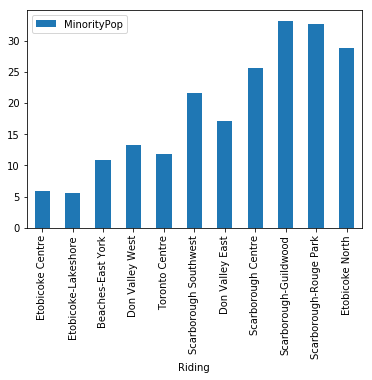

In [78]:
sa_pop.plot.bar(y='MinorityPop',x='Riding')